This file runs the toy model from Experiment 4 on different combinations of the CIFARS10 dataset and compares monosemanticity/Performance across the different options. (ONLY DOES 2-2 Combos for 45 different options) 

In [ ]:
#import required packages
!pip install torch torchvision

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using device: cpu


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

def filter_classes(dataset, classes):
    indices = []
    for i, (_, label) in enumerate(dataset):
        if label in classes:
            indices.append(i)
    return torch.utils.data.Subset(dataset, indices)

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define the classes you want to load
selected_classes = [1,8]
cifar_class_names = ["Aeroplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
num_epochs = 20

# Load CIFAR10 dataset
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
full_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to keep only the selected classes:
# Custom dataset class to remap the class labels
class CustomCIFAR10(torchvision.datasets.CIFAR10):
    def __init__(self, *args, **kwargs):
        super(CustomCIFAR10, self).__init__(*args, **kwargs)

        self.label_map = {label: idx for idx, label in enumerate(selected_classes)}

        indices = [i for i, label in enumerate(self.targets) if label in selected_classes]

        self.data = self.data[indices]
        self.targets = [self.label_map[label] for label in self.targets if label in selected_classes]

# Load filtered CIFAR10 dataset using the custom dataset class
filtered_train_set = CustomCIFAR10(root='./data', train=True, download=True, transform=transform)
filtered_test_set = CustomCIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the filtered_trainset into train and validation subsets
train_size = int(0.8 * len(filtered_train_set))
val_size = len(filtered_train_set) - train_size
train_set, val_set = torch.utils.data.random_split(filtered_train_set, [train_size, val_size])

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=100, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(filtered_test_set, batch_size=100, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Check that the data loaded properly

# Print the number of classes and their names for the original CIFAR-10 dataset
print("Original CIFAR-10 dataset:")
print("Number of classes:", len(full_trainset.classes))
print("Class names:", full_trainset.classes)

# Print the number of selected classes and their names for the filtered dataset
print("\nFiltered dataset:")
print("Number of selected classes:", len(selected_classes))
print("Selected class names:", [full_trainset.classes[i] for i in selected_classes])

print(f"Number of images in train loader: {len(train_loader.dataset)}")
print(f"Number of images in val loader: {len(val_loader.dataset)}")
print(f"Number of images in test loader: {len(test_loader.dataset)}")


Original CIFAR-10 dataset:
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Filtered dataset:
Number of selected classes: 2
Selected class names: ['automobile', 'ship']
Number of images in train loader: 8000
Number of images in val loader: 2000
Number of images in test loader: 2000


In [ ]:
class ToyCNN(nn.Module):
    def __init__(self, num_classes=len(selected_classes)):
        super(ToyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ToyCNN().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

Epoch 1, Train Loss: 0.6641, Validation Loss: 0.6168
Epoch 2, Train Loss: 0.5516, Validation Loss: 0.5121
Epoch 3, Train Loss: 0.4454, Validation Loss: 0.4176
Epoch 4, Train Loss: 0.3739, Validation Loss: 0.3576
Epoch 5, Train Loss: 0.3412, Validation Loss: 0.3331
Epoch 6, Train Loss: 0.3180, Validation Loss: 0.3186
Epoch 7, Train Loss: 0.2957, Validation Loss: 0.2971
Epoch 8, Train Loss: 0.2671, Validation Loss: 0.3043
Epoch 9, Train Loss: 0.2512, Validation Loss: 0.2591
Epoch 10, Train Loss: 0.2661, Validation Loss: 0.2286
Epoch 11, Train Loss: 0.2339, Validation Loss: 0.2550
Epoch 12, Train Loss: 0.2229, Validation Loss: 0.2245
Epoch 13, Train Loss: 0.2160, Validation Loss: 0.2414
Epoch 14, Train Loss: 0.2094, Validation Loss: 0.2113
Epoch 15, Train Loss: 0.1997, Validation Loss: 0.2145
Epoch 16, Train Loss: 0.1897, Validation Loss: 0.1969
Epoch 17, Train Loss: 0.1896, Validation Loss: 0.2346
Epoch 18, Train Loss: 0.1780, Validation Loss: 0.1758
Epoch 19, Train Loss: 0.1845, Validat

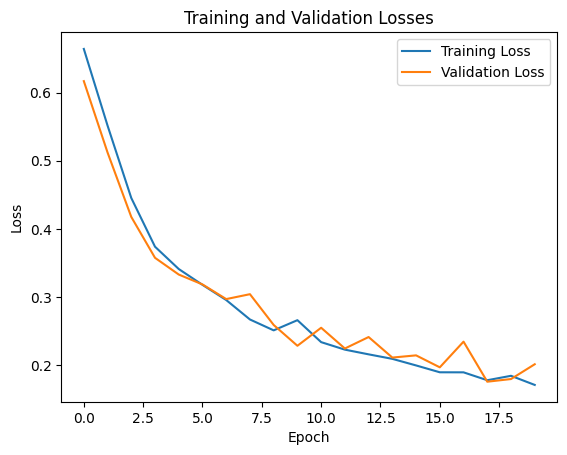

In [ ]:
import matplotlib.pyplot as plt

def train(net, train_loader, optimizer, device, criterion):
    net.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    return train_loss

def validate(net, val_loader, criterion, device):
    net.eval()
    running_loss = 0.0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    val_loss = running_loss / len(val_loader)
    return val_loss

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss = train(net, train_loader, optimizer, device, criterion)
    val_loss = validate(net, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Plot the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()


In [ ]:
def measure_polysemanticity(layer):
    activations = []

    def hook(module, input, output):
        activations.append(output)

    hook_handle = layer.register_forward_hook(hook)

    # Pass a batch of images through the network
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            _ = net(images)

    hook_handle.remove()

    # Calculate mean activations for each neuron
    mean_activations = [torch.mean(a, dim=(0, 2, 3)).cpu().numpy() for a in activations]
    mean_activations = np.stack(mean_activations).mean(axis=0)

    return mean_activations

conv1_polysemanticity = measure_polysemanticity(net.conv1)
conv2_polysemanticity = measure_polysemanticity(net.conv2)

print("Conv1 Polysemanticity:", conv1_polysemanticity)
print("Conv2 Polysemanticity:", conv2_polysemanticity)


Conv1 Polysemanticity: [-0.11513414  0.11514286 -0.34740913 -0.04418515 -0.27758628 -0.43077153]
Conv2 Polysemanticity: [-1.2422636  -0.5641054   0.02960303 -0.8800367  -0.0889934  -0.33062422
 -0.65189683 -0.20122898 -1.0092676  -0.70501554 -0.28593624 -0.01182819
 -0.44342393 -1.0734811  -0.4763464  -1.0995241 ]


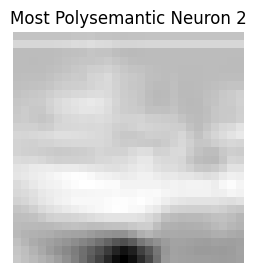

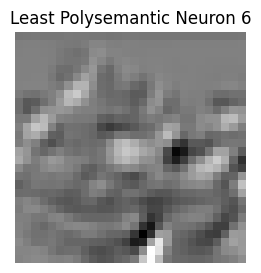

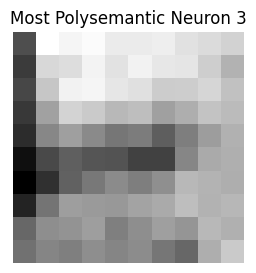

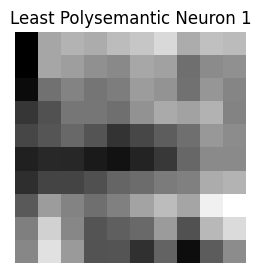

In [ ]:
import matplotlib.pyplot as plt

def visualize_polysemantic_neurons(layer, polysemanticity, num_neurons=1):
    most_polysemantic_indices = polysemanticity.argsort()[-num_neurons:]
    least_polysemantic_indices = polysemanticity.argsort()[:num_neurons]

    activations = []

    def hook(module, input, output):
        activations.append(output)

    hook_handle = layer.register_forward_hook(hook)

    # Pass a batch of images through the network
    with torch.no_grad():
        images, _ = next(iter(test_loader))
        images = images.to(device)
        _ = net(images)

    hook_handle.remove()

    for idx, title in zip([most_polysemantic_indices, least_polysemantic_indices], ['Most', 'Least']):
        if num_neurons > 1:
            fig, axs = plt.subplots(1, num_neurons, figsize=(3 * num_neurons, 3))
            for i, neuron_idx in enumerate(idx):
                feature_map = activations[0][0, neuron_idx].cpu().numpy()
                axs[i].imshow(feature_map, cmap='gray')
                axs[i].axis('off')
                axs[i].set_title(f'{title} Polysemantic Neuron {neuron_idx + 1}')
        else:
            fig, ax = plt.subplots(figsize=(3, 3))
            neuron_idx = idx[0]
            feature_map = activations[0][0, neuron_idx].cpu().numpy()
            ax.imshow(feature_map, cmap='gray')
            ax.axis('off')
            ax.set_title(f'{title} Polysemantic Neuron {neuron_idx + 1}')
        plt.show()

# Visualize the most and least polysemantic neurons in conv1 and conv2
visualize_polysemantic_neurons(net.conv1, conv1_polysemanticity)
visualize_polysemantic_neurons(net.conv2, conv2_polysemanticity)


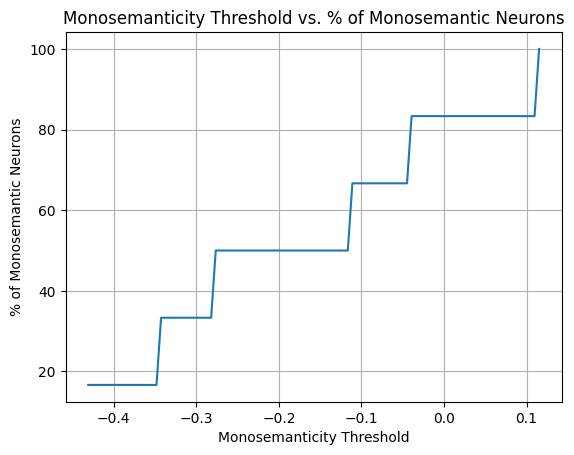

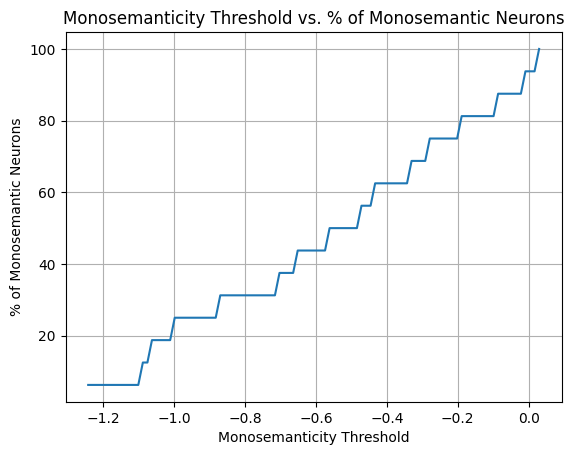

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_monosemanticity(polysemanticity, num_thresholds=100):
    thresholds = np.linspace(polysemanticity.min(), polysemanticity.max(), num_thresholds)
    percentages = []

    for threshold in thresholds:
        monosemantic_neurons = np.sum(polysemanticity <= threshold)
        percentage = (monosemantic_neurons / polysemanticity.size) * 100
        percentages.append(percentage)

    plt.plot(thresholds, percentages)
    plt.xlabel('Monosemanticity Threshold')
    plt.ylabel('% of Monosemantic Neurons')
    plt.title('Monosemanticity Threshold vs. % of Monosemantic Neurons')
    plt.grid()
    plt.show()

# Example usage with conv1_polysemanticity
plot_monosemanticity(conv1_polysemanticity)

plot_monosemanticity(conv2_polysemanticity)

In [ ]:
#Run a test over all data. Return % correct
def test_nn(model, device, test_loader):
    net.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            total += labels.size(0)
            if i%10 == 0:
                print(f"Iteration {i}: Labels: {labels}")
                print(str(labels.size(0)) + " = labels, inputs = " + str(inputs.size(0)))
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()


    return correct/total    

# Set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net.to(device)
print(test_nn(net, device, test_loader))


Iteration 0: Labels: tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1])
100 = labels, inputs = 100
Iteration 10: Labels: tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1])
100 = labels, inputs = 100
0.9335
